In [15]:
#python3

#import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import time
import os
from auxiliary_functions import *
import seaborn as sns
sns.set()

In [393]:
#set the working directory
#os. chdir('/Users/adityaranganathan/Dropbox/Harvard_Research/repos/herding_new/SI_videos/driving')
#os. chdir('/Users/adityaranganathan/Dropbox/Harvard_Research/repos/herding_new/SI_videos/droving')
#os. chdir('/Users/adityaranganathan/Dropbox/Harvard_Research/repos/herding_new/SI_videos/droving_slow')
#os. chdir('/Users/adityaranganathan/Dropbox/Harvard_Research/repos/herding_new/SI_videos/mustering')
os. chdir('/Users/adityaranganathan/Dropbox/Harvard_Research/repos/herding_new/SI_videos/mustering_slow')

In [394]:
#set user defined parameters

L = 6 #size of domain to plot
dt = 0.05 #manually setting the timestep size (should eventually be grabbed from load_params_auto)

#start timing
t0 = time.time()

#import data files
dat_field = np.loadtxt('data.txt') #x,y position data for herd and dogs
#dat_field = np.loadtxt('driving_data_SIVid.txt') #x,y position data for herd and dogs

#load info from parameter file
driving_on, x_target, y_target, vs, vd, ls, ld, fence, num_particles, ndogs, modder = load_params_auto('params.txt')

#load info from data file
xpart, ypart, thetapart, x_dogs, y_dogs, dat_times, timesteps, times, = load_data(dat_field, num_particles)


#sanity checks
sanity_checks(dat_field, num_particles, ndogs, timesteps)


Looking at data & performing sanity checks...
There are  100 sheep!
There are  1 dogs!
There are 9759 frames of dumped data!


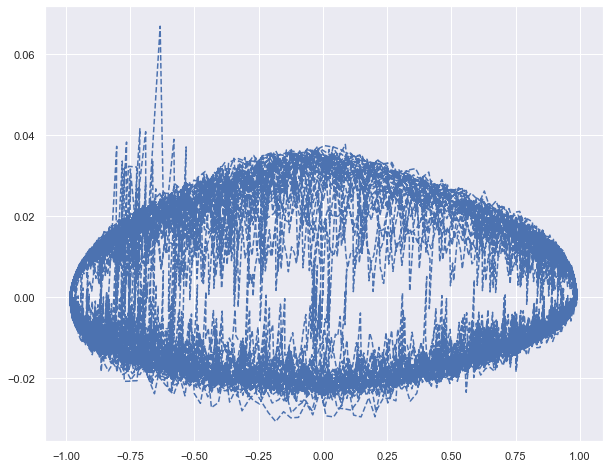

In [430]:
avg_polarization_1 = np.zeros(timesteps)
std_polarization_1 = np.zeros(timesteps)
delta_polarization_1 = np.zeros(timesteps)
avg_polarization_cos = np.zeros(timesteps)
std_polarization_cos = np.zeros(timesteps)
delta_polarization_cos = np.zeros(timesteps)
modder = 1

counterr = 0
for t in range(1,timesteps):
#for t in range(10):

#fork here
#for t in range(0,100):
    if t%modder == 0:
        counterr +=1
        
        #download particle data
        index = num_particles*t
        tmp_x = xpart[index: index+num_particles]
        tmp_y = ypart[index: index+num_particles]
        #tmp_theta = thetapart[index: index+num_particles]
        tmp_theta = thetapart[index: index+num_particles]%(2*np.pi)
        
        
        #calculate the angle between the target and the dog (ONLY FOR 1 DOG)
        tmp_target_angle = np.arctan2(y_target-y_dogs[index,0], x_target-x_dogs[index,0])
        # set color info
        tmp_colors = (tmp_theta - tmp_target_angle)%(2*np.pi) #colorator(tmp_theta)
        
        avg_polarization_1[t] = np.average(tmp_theta)
        avg_polarization_cos[t] = np.average(np.cos(tmp_theta))
        std_polarization_1[t] = np.std(tmp_theta)
        delta_polarization_1[t] = (avg_polarization_1[t]-avg_polarization_1[t-1])
        delta_polarization_cos[t] = (avg_polarization_cos[t]-avg_polarization_cos[t-1])
        


error_up = avg_polarization_1 + 2.0*std_polarization_1
error_down = avg_polarization_1 - 2.0*std_polarization_1
        
plt.figure(figsize = (10,8))
plt.plot(avg_polarization_cos[10:], delta_polarization_cos[10:], '--')
#plt.plot(np.arccos(avg_polarization_1), np.arccos(delta_polarization_1), '--')

In [431]:
np.min(thetapart[100:])

-3.141589

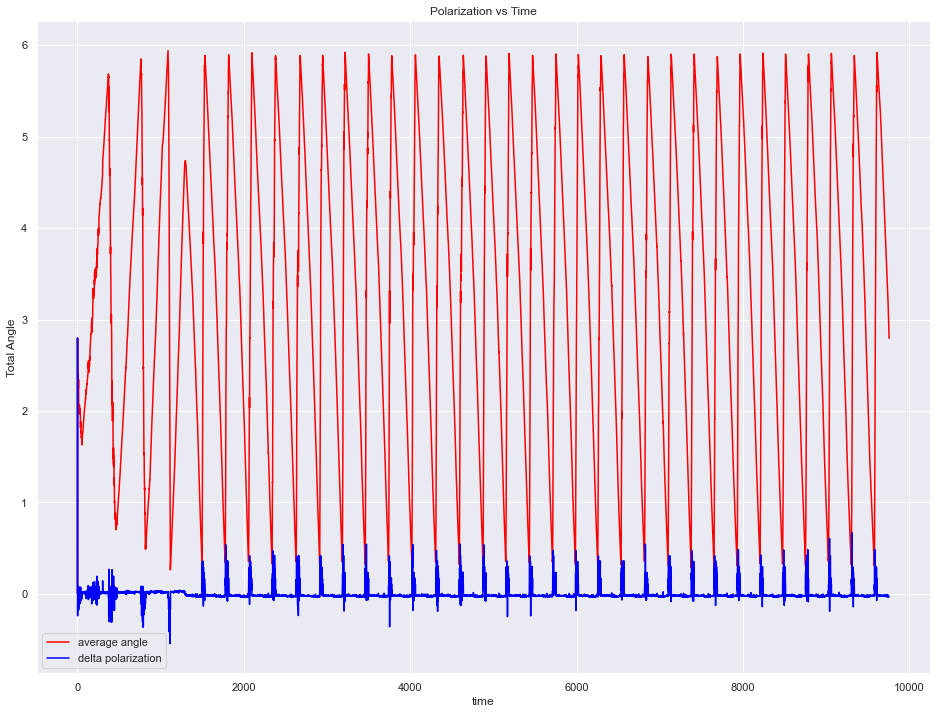

In [434]:
avg_polarization_smooth = np.array([avg_polarization_1[ii] for ii in range(len(avg_polarization_1))])

upper_count = 0
downer_count = 0

for kk in range(1, timesteps):
    if avg_polarization_smooth[kk]-avg_polarization_smooth[kk-1] > np.pi/4:
        avg_polarization_smooth[kk-1:]= avg_polarization_smooth[kk-1:]-2*np.pi
    if avg_polarization_smooth[kk]-avg_polarization_smooth[kk-1] < -np.pi/4:
        avg_polarization_smooth[kk-1:]= avg_polarization_smooth[kk-1:]+2*np.pi
        

delta_polarization_smooth = np.zeros(timesteps)
for kk in range(1, timesteps):
    delta_polarization_smooth[kk] = avg_polarization_smooth[kk]-avg_polarization_smooth[kk-1]

plt.figure(figsize = (16,12))
plt.title("Polarization vs Time")
plt.ylabel("Total Angle")
plt.xlabel("time")
# plt.plot(times, error_up)
# plt.plot(times, error_down)
#plt.fill_between(times, error_down, error_up, alpha=0.5, edgecolor='k', facecolor='#7EFF99', label = '2 std bound')
plt.plot(times, avg_polarization_1,'red', label = 'average angle')#
#plt.plot(times, avg_polarization_1, 'red', label = 'average angle')#
#plt.plot(times, avg_polarization_smooth, '.', 'green', label = 'total average angle')
#plt.plot(times, delta_polarization_1, 'blue', label = 'delta polarization')
#plt.xlim(50,100)
#plt.ylim(-2*np.pi, 2*np.pi)
#plt.xlim(5040, 5075)
plt.legend()
# plt.savefig("total_avg_angle_droving.png")
#plt.savefig("total_avg_angle_droving.png")
#plt.savefig('total_avg_angle_mustering.png')
plt.show()

In [426]:
np.shape(times)

(9759,)

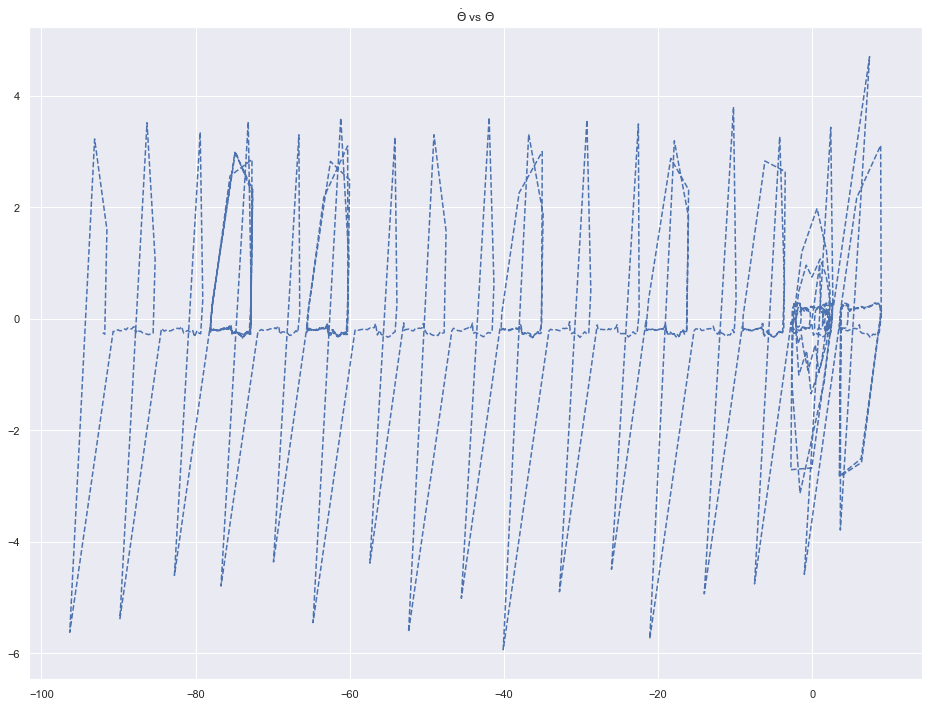

In [381]:
avg_polarization_smooth = np.array([avg_polarization_1[ii] for ii in range(len(avg_polarization_1))])

upper_count = 0
downer_count = 0

for kk in range(1, timesteps):
    if avg_polarization_smooth[kk]-avg_polarization_smooth[kk-1] > np.pi/2:
        avg_polarization_smooth[kk-1:]= avg_polarization_smooth[kk-1:]-2*np.pi
    if avg_polarization_smooth[kk]-avg_polarization_smooth[kk-1] < -np.pi/2:
        avg_polarization_smooth[kk-1:]= avg_polarization_smooth[kk-1:]+2*np.pi
        

delta_polarization_smooth = np.zeros(timesteps)
for kk in range(1, timesteps):
    delta_polarization_smooth[kk] = avg_polarization_smooth[kk]-avg_polarization_smooth[kk-1]

plt.figure(figsize = (16,12))
plt.plot(avg_polarization_smooth, delta_polarization_smooth, '--')
#plt.plot(avg_polarization_smooth%(2*np.pi), delta_polarization_smooth, '.')
plt.title("$\dot \Theta$ vs $\Theta$")
#plt.savefig("q_qdot_droving.png")
#plt.savefig("q_qdot_mustering.png")
plt.show()

9759


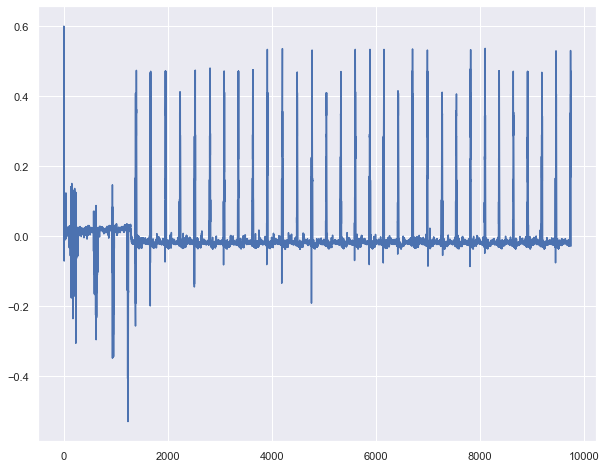

In [403]:
print(timesteps)
plt.figure(figsize = (10,8))
plt.plot(delta_polarization_smooth)

In [401]:
print(np.max(delta_polarization_1), np.argmax(delta_polarization_1))
print(np.min(delta_polarization_1), np.argmin(delta_polarization_1))

0.59937464 1
-0.5304840200000001 1234


In [402]:
print(avg_polarization_1[np.argmax(delta_polarization_1)-2:np.argmax(delta_polarization_1)+2])
print(avg_polarization_1[np.argmin(delta_polarization_1)-2:np.argmin(delta_polarization_1)+2])

[]
[ 0.47778936  0.1956169  -0.33486712 -0.74037251]


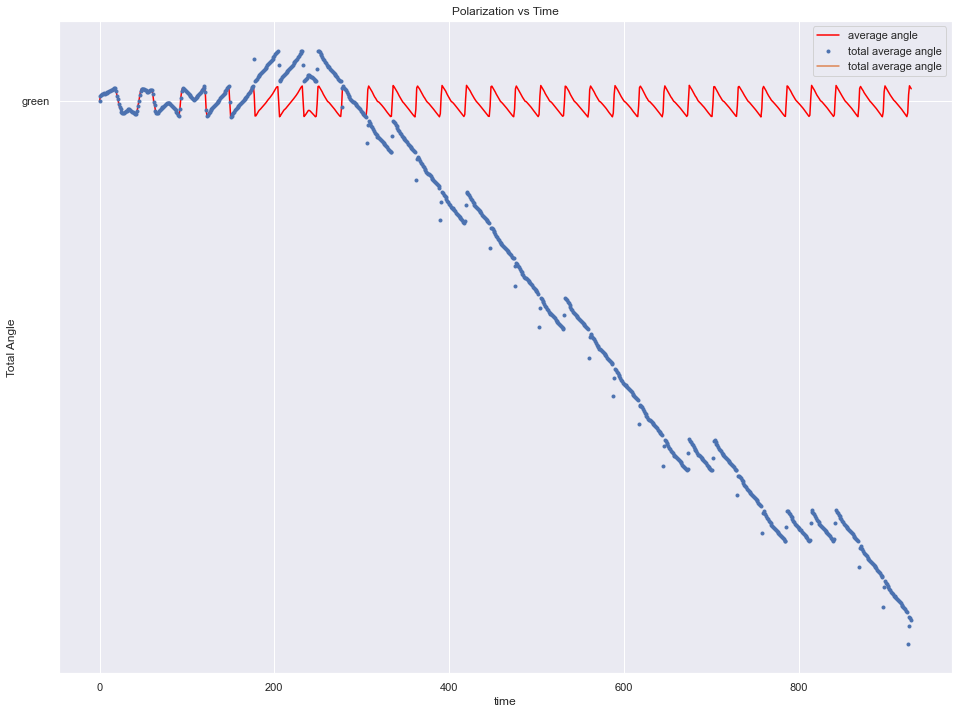

In [387]:


plt.figure(figsize = (16,12))
plt.title("Polarization vs Time")
plt.ylabel("Total Angle")
plt.xlabel("time")
# plt.plot(times, error_up)
# plt.plot(times, error_down)
#plt.fill_between(times, error_down, error_up, alpha=0.5, edgecolor='k', facecolor='#7EFF99', label = '2 std bound')
plt.plot(times, avg_polarization_1, 'red', label = 'average angle')#
plt.plot(times, avg_polarization_smooth, '.', 'green', label = 'total average angle')
#plt.plot(times, delta_polarization_1, 'blue', label = 'delta polarization')
#plt.xlim(50,100)
#plt.ylim(-2*np.pi, 2*np.pi)
plt.legend()
# plt.savefig("total_avg_angle_droving.png")
#plt.savefig("total_avg_angle_droving.png")
#plt.savefig('total_avg_angle_mustering.png')
plt.show()




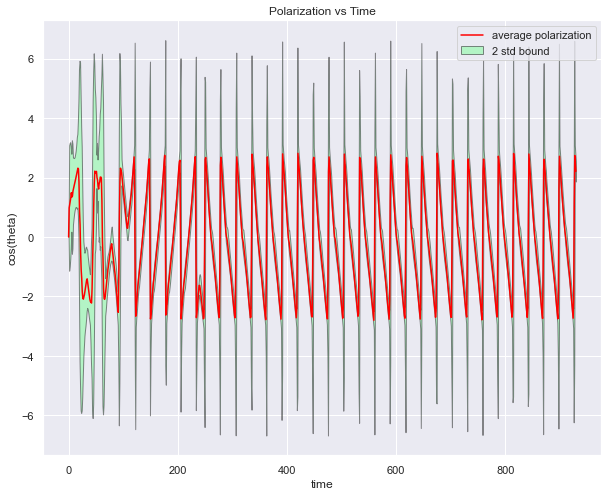

In [227]:
# avg_polarization_1 = np.zeros(timesteps)
# std_polarization_1 = np.zeros(timesteps)
# delta_polarization_1 = np.zeros(timesteps)
# modder = 1

# counterr = 0
# for t in range(timesteps):
# #for t in range(10):

# #fork here
# #for t in range(0,100):
#     if t%modder == 0:
#         counterr +=1
        
#         #download particle data
#         index = num_particles*t
#         tmp_x = xpart[index: index+num_particles]
#         tmp_y = ypart[index: index+num_particles]
#         tmp_theta = thetapart[index: index+num_particles]
        
        
#         #calculate the angle between the target and the dog (ONLY FOR 1 DOG)
#         tmp_target_angle = np.arctan2(y_target-y_dogs[index,0], x_target-x_dogs[index,0])
#         # set color info
#         tmp_colors = (tmp_theta - tmp_target_angle)%(2*np.pi) #colorator(tmp_theta)
        
#         avg_polarization_1[t] = np.average(tmp_theta) #np.average(np.cos(tmp_theta)) #np.average(tmp_colors) #np.average(tmp_theta)
#         std_polarization_1[t] = np.std(np.cos(tmp_theta))

        


# error_up = avg_polarization_1 + 2.0*std_polarization_1
# error_down = avg_polarization_1 - 2.0*std_polarization_1
        
plt.figure(figsize = (10,8))
plt.title("Polarization vs Time")
plt.ylabel("cos(theta)")
plt.xlabel("time")
# plt.plot(times, error_up)
# plt.plot(times, error_down)
plt.fill_between(times, error_down, error_up, alpha=0.5, edgecolor='k', facecolor='#7EFF99', label = '2 std bound')
plt.plot(times, avg_polarization_1, 'red', label = 'average polarization')
plt.legend()
plt.show()

In [23]:
np.shape(dat_field)

(3154300, 7)

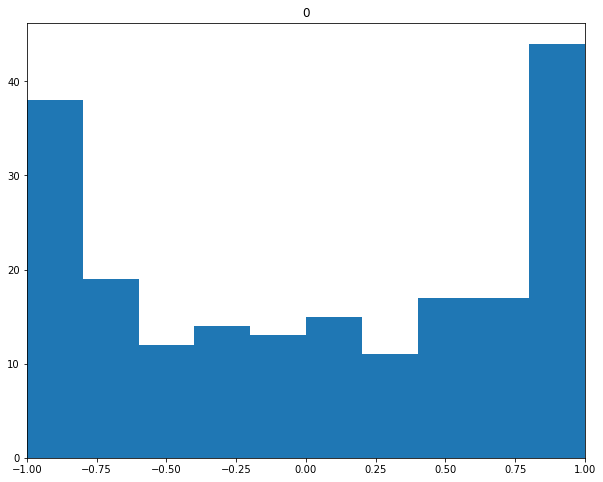

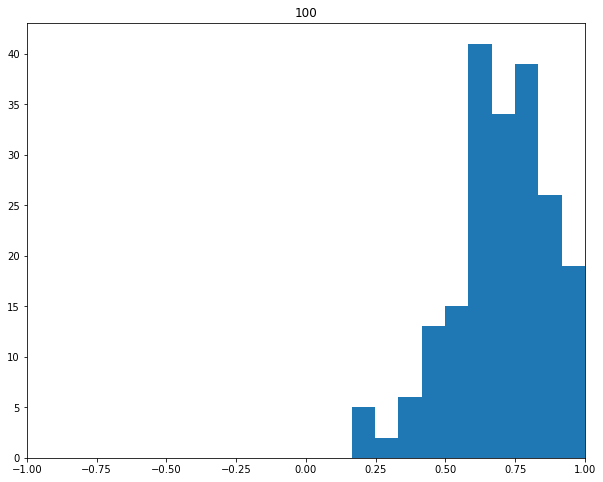

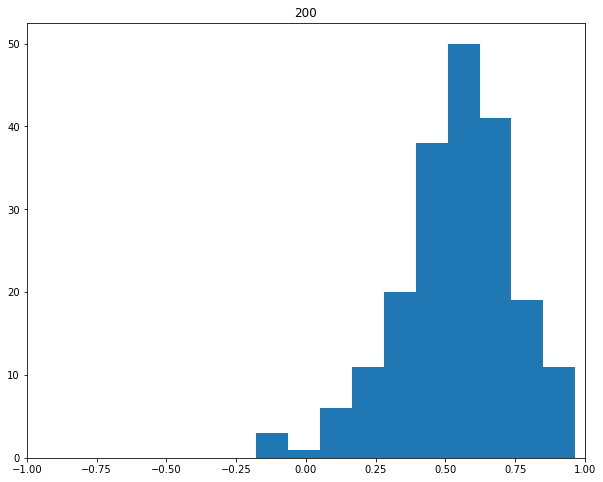

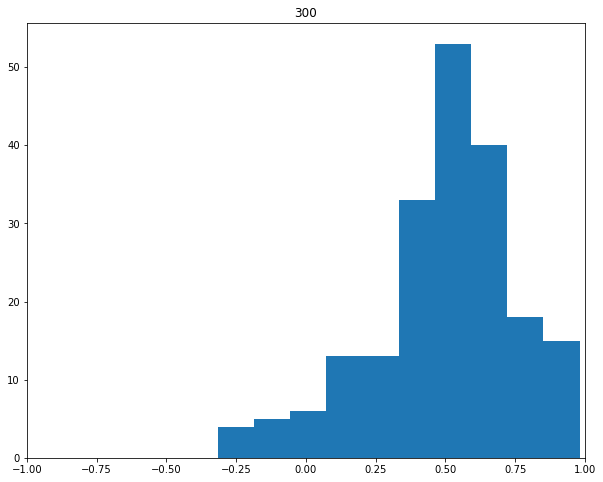

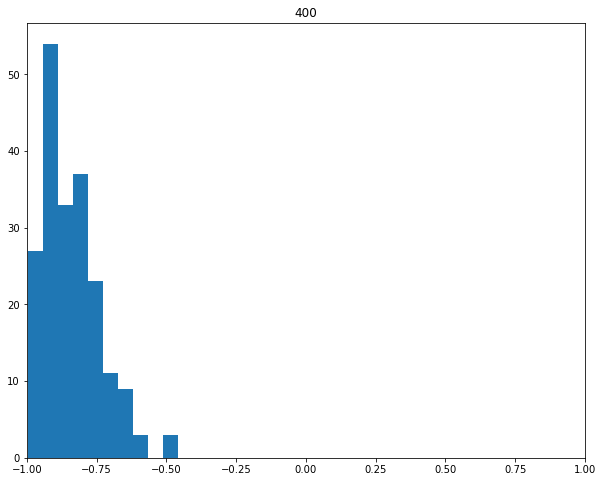

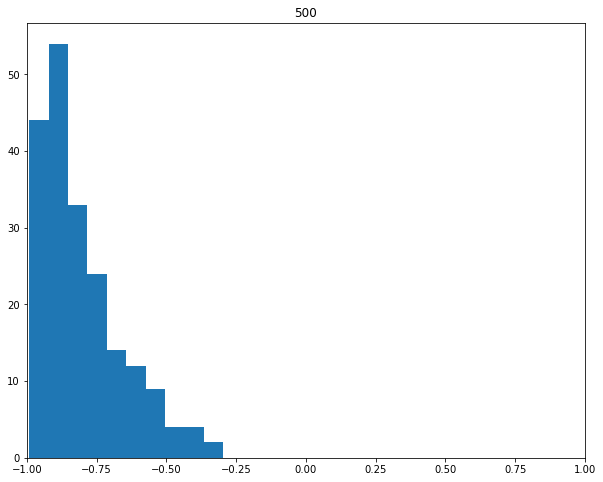

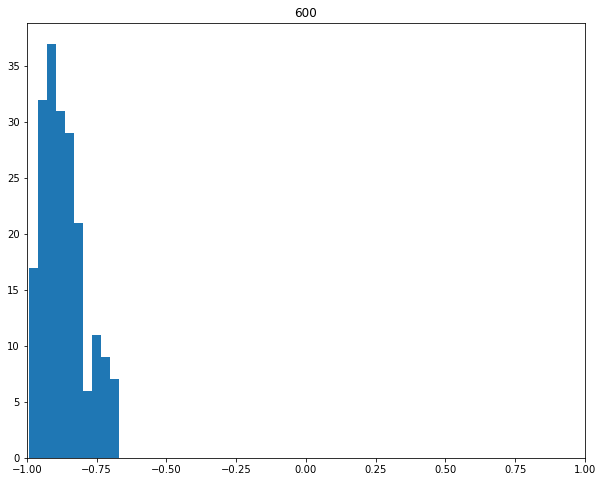

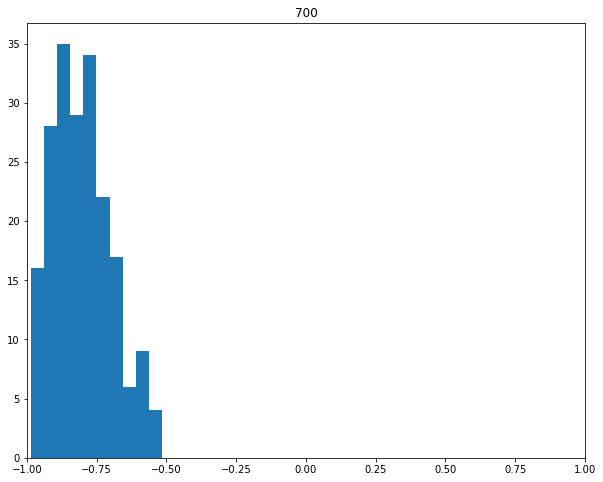

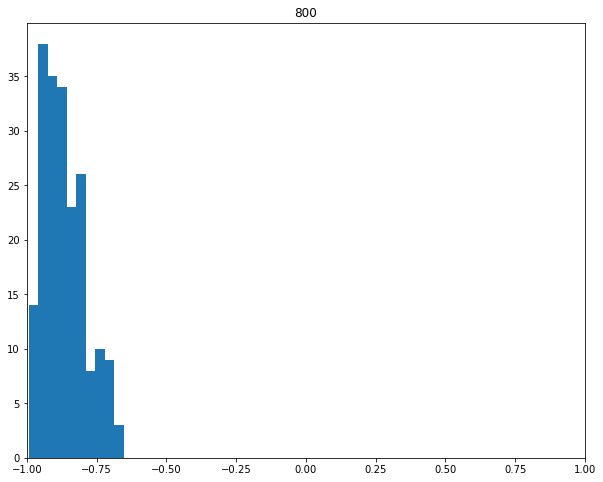

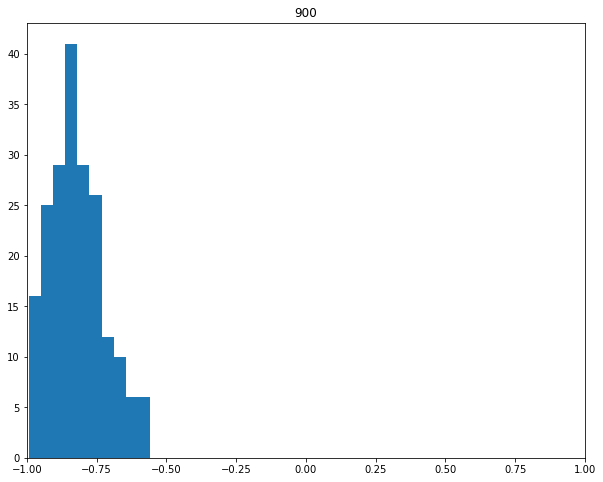

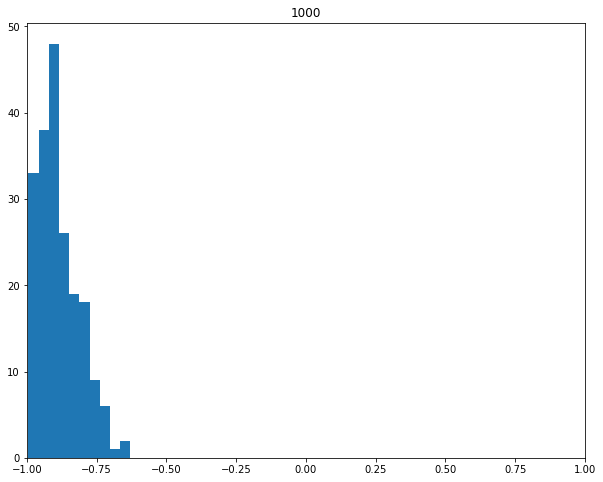

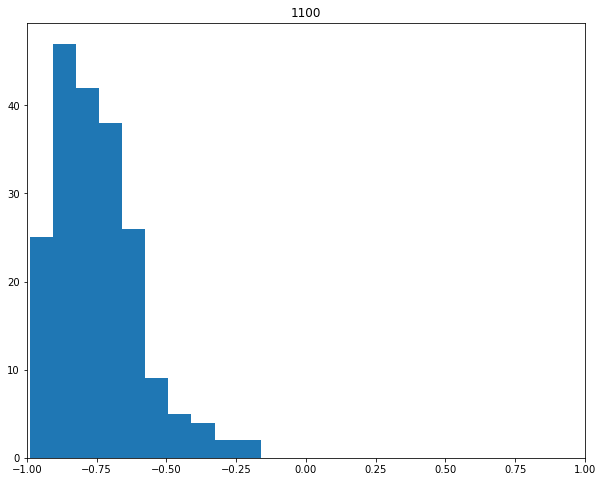

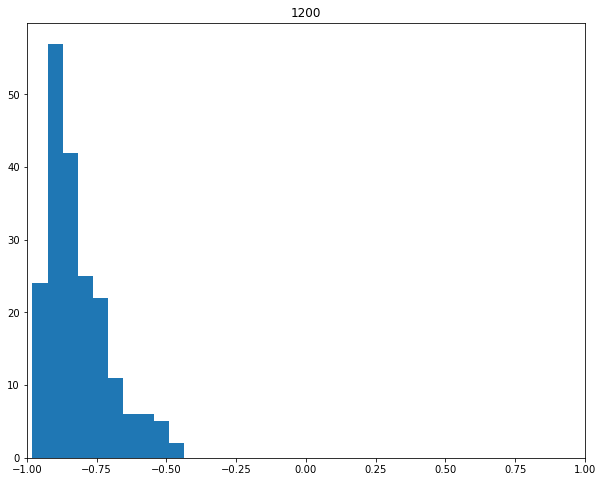

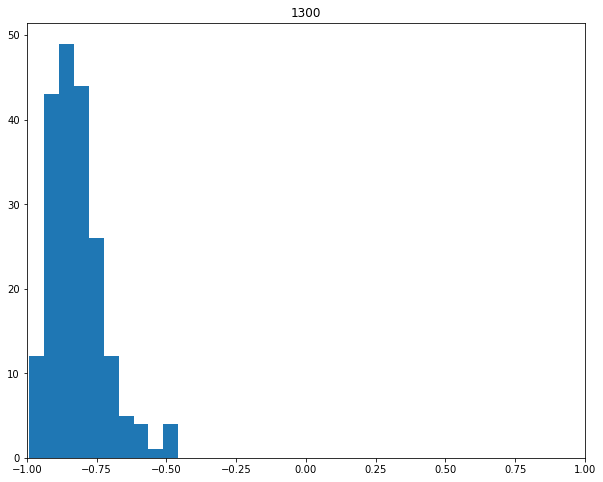

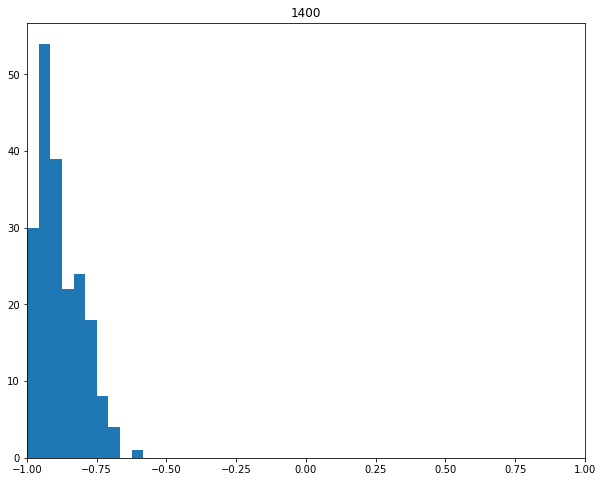

In [13]:
avg_polarization_1 = np.ones(timesteps)
modder = 100

counterr = 0
for t in range(timesteps):
#for t in range(10):

#fork here
#for t in range(1000, 1030):
    if t%modder == 0:
        counterr +=1
        
        #download particle data
        index = num_particles*t
        tmp_x = xpart[index: index+num_particles]
        tmp_y = ypart[index: index+num_particles]
        tmp_theta = thetapart[index: index+num_particles]
        
        
        #calculate the angle between the target and the dog (ONLY FOR 1 DOG)
        tmp_target_angle = np.arctan2(y_target-y_dogs[index,0], x_target-x_dogs[index,0])
        # set color info
        tmp_colors = (tmp_theta - tmp_target_angle)%(2*np.pi) #colorator(tmp_theta)
        
        avg_polarization_1[t] = np.average(tmp_theta) #np.average(tmp_colors) #np.average(tmp_theta)
        
        plt.figure(figsize = (10,8))
        plt.title(t)
        plt.hist(np.cos(tmp_theta))
        plt.xlim(-1,1)
        #plt.xlim(0, 2*np.pi)
        plt.show()
        
# plt.figure(figsize = (10,8))
# plt.plot(times, avg_polarization_1, '.')

In [30]:
!pwd

/Users/adityaranganathan/Dropbox/Harvard_Research/repos/herding_new/SI_videos/driving


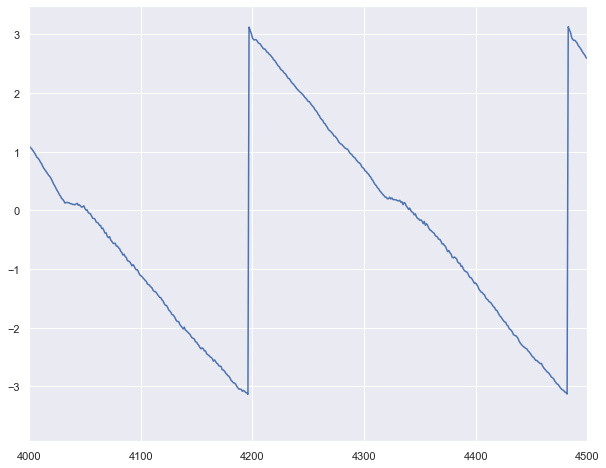

In [436]:
plt.figure(figsize = (10,8))
plt.plot(times, thetapart[50::100])
plt.xlim(4000, 4500)
plt.show()

In [ ]:
avg_polarization_smooth = np.array([avg_polarization_1[ii] for ii in range(len(avg_polarization_1))])

upper_count = 0
downer_count = 0

for kk in range(1, timesteps):
    if avg_polarization_smooth[kk]-avg_polarization_smooth[kk-1] > np.pi/4:
        avg_polarization_smooth[kk-1:]= avg_polarization_smooth[kk-1:]-2*np.pi
    if avg_polarization_smooth[kk]-avg_polarization_smooth[kk-1] < -np.pi/4:
        avg_polarization_smooth[kk-1:]= avg_polarization_smooth[kk-1:]+2*np.pi
        

delta_polarization_smooth = np.zeros(timesteps)
for kk in range(1, timesteps):
    delta_polarization_smooth[kk] = avg_polarization_smooth[kk]-avg_polarization_smooth[kk-1]

plt.figure(figsize = (16,12))
plt.title("Polarization vs Time")
plt.ylabel("Total Angle")
plt.xlabel("time")
# plt.plot(times, error_up)
# plt.plot(times, error_down)
#plt.fill_between(times, error_down, error_up, alpha=0.5, edgecolor='k', facecolor='#7EFF99', label = '2 std bound')
plt.plot(times, avg_polarization_1,'red', label = 'average angle')#
#plt.plot(times, avg_polarization_1, 'red', label = 'average angle')#
#plt.plot(times, avg_polarization_smooth, '.', 'green', label = 'total average angle')
#plt.plot(times, delta_polarization_1, 'blue', label = 'delta polarization')
#plt.xlim(50,100)
#plt.ylim(-2*np.pi, 2*np.pi)
#plt.xlim(5040, 5075)
plt.legend()
# plt.savefig("total_avg_angle_droving.png")
#plt.savefig("total_avg_angle_droving.png")
#plt.savefig('total_avg_angle_mustering.png')
plt.show()